The time taken for the rocket to reach terminal velocity is 258s
The maximum velocity of the rocket is 2050.00m/s


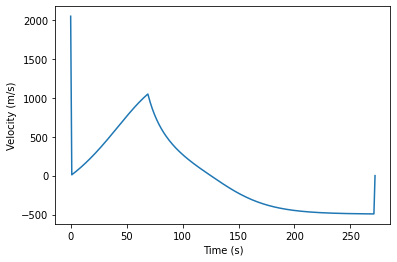

The maximum height of the rocket is 55714.11m


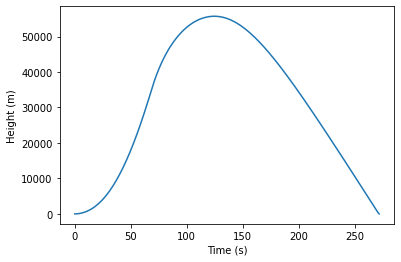

In [1]:
import matplotlib.pyplot as plt
import math
import time
import numpy as np

#Enter ANY integer number from your head: 23702340928304
#You entered as seed for the random number generator: 23702340928304
#The mass of the rocket (without fuel) is: 4076 Kg
#The mass of fuel in the tank is: 8873 Kg
#The total mass of the rocket with tank full is: 12949 Kg


#random generated mass
M=12949
M_r=4076
M_f=-M_r+M

#provided information
dmdt=129.4
g=9.81
rho=1.22
v_e=2050
C=0.125

D=1.65
r=D/2
A=(math.pi)*(r**2)

#constant thrust equation
F_t=v_e*(dmdt)
#initial conditions
v=0
t=0
x=0
dt=1 #as the dm/dt is per second

v_list=[v_e]
t_list=[t]
x_list=[x]


while M_f>(0):
  M_f=M_f-dmdt
  if M_f<0:
    M_f=0
  M=M_f+M_r
  
  F_g=M*g
  F_d=(1/2)*(rho)*(v**2)*(C*A)
  dvdt=(1/M)*F_t-(1/M)*F_g-(1/M)*F_d
  dv=dvdt*dt
  v=v+dv
  dx=v*dt
  x=x+dx
  t=t+dt


  v_list.append(v)
  x_list.append(x)
  t_list.append(t)




while v>(0):
  

  F_g=M*g
  F_d=(1/2)*(rho)*(v**2)*(C*A)
  dvdt=-(1/M)*F_g-(1/M)*F_d
  dv=dvdt*dt
  v=v+dv
  dx=v*dt
  x=x+dx
  t=t+dt

  v_list.append(v)
  x_list.append(x)
  t_list.append(t)


while x>(0):
  if x<0:
    x=0

  F_g=M*g
  F_d=(1/2)*(rho)*(v**2)*(C*A)
  dvdt=-(1/M)*F_g+(1/M)*F_d
  dv=dvdt*dt
  v=v+dv
  dx=v*dt
  x=x+dx
  if x<0:
    x=0
    v=0
  t=t+dt

  v_list.append(v)
  x_list.append(x)
  t_list.append(t)




max_velocity=max(v_list)
max_x=max(x_list)

dictionary=dict(zip(t_list,v_list))
#print(len(dictionary))
#print(t_list)
term_time_list=[]
for i in range (1,len(dictionary)):
  
  if abs((dictionary[i-1])-(dictionary[i]))<0.2:
    term_time_list.append(i)
  

term_time=min(term_time_list)
print("The time taken for the rocket to reach terminal velocity is %.0fs" %term_time)

print("The maximum velocity of the rocket is %.2fm/s" %max_velocity )
plt.plot(t_list,v_list)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

print("The maximum height of the rocket is %.2fm" %max_x )
plt.plot(t_list,x_list)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()







